# Environment

In [1]:
import google.cloud.bigquery as bigquery, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from astropy.visualization import hist as astro_hist

In [3]:
sns.set()

# Preprocessing

In [4]:
#! python3 ../../src/preprocessing/preprocessing.py --runner DataflowRunner #DataFlow runner
#! python3 ../../src/preprocessing/preprocessing.py #Direct runner

# Data Visualization

In [5]:
table = "stackoverflow.posts_preprocessed_selection_subset"

In [6]:
client = bigquery.Client()

In [7]:
query = """SELECT
 id, 
 title, 
 ARRAY_LENGTH(SPLIT(title, ' ')) as title_length, 
 text_body, 
 ARRAY_LENGTH(SPLIT(text_body, ' ')) as text_body_length,
 code_body,
 ARRAY_LENGTH(SPLIT(code_body, ' ')) as code_body_length,
 tags,
 ARRAY_LENGTH(tags) as tags_length
FROM
  {table}""".format(
    table=table
)

In [8]:
df = client.query(query).to_dataframe()

In [9]:
df.head()

,id,title,title_length,text_body,text_body_length,code_body,code_body_length,tags,tags_length
0,18331585,struct,1,new elementary level question read source file...,18,struct globalargs int noindex char langcode co...,19,[c],1
1,23085906,receive large negative number result read smal...,12,file name counts txt file hold single value nu...,19,include stdio include conio void main void fil...,24,[c],1
2,17417688,mean,1,know hexadecimal representation ascii literal ...,7,printf x41 printf x41,4,[c],1
3,4999267,asterisk,1,learn programming understand asterisk main met...,12,int main int argc char argv,6,[c],1
4,8783890,,1,possible duplicate unsigned temp mean try lear...,13,unsigned char iph ihl iph ver,6,[c],1


## Title

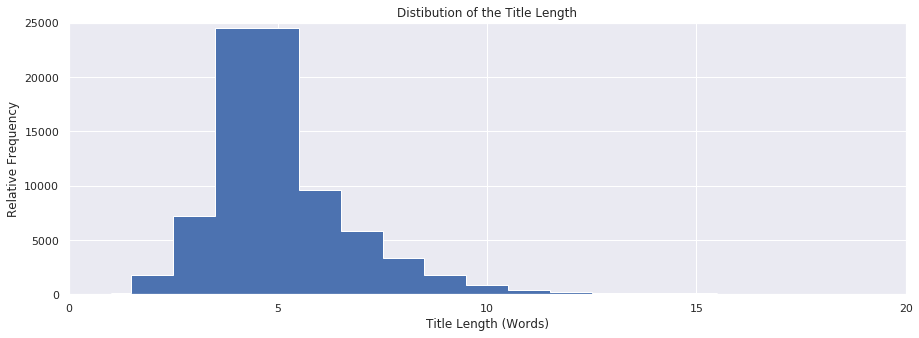

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

astro_hist(df["title_length"], bins="blocks", histtype="stepfilled")

ax.set(xlabel='Title Length (Words)', 
       ylabel='Relative Frequency', 
       title='Distibution of the Title Length', 
       xlim=[0, 20],
       ylim=[0, 25000],
      xticks=range(0, 21, 5));

## Text

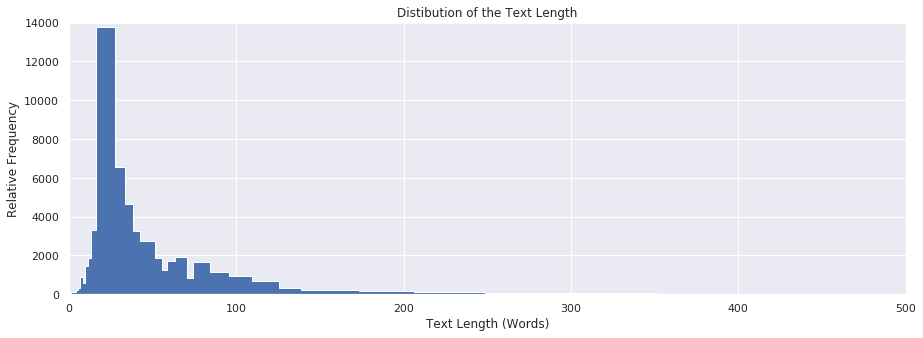

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

astro_hist(df["text_body_length"], bins="blocks", histtype="stepfilled");

ax.set(xlabel='Text Length (Words)', 
       ylabel='Relative Frequency', 
       title='Distibution of the Text Length', 
       xlim=[0, 500],
       ylim=[0, 14000]);

## Code

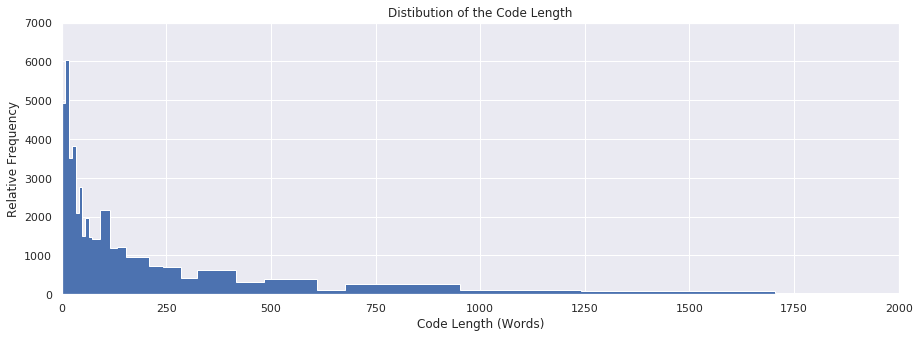

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

astro_hist(df['code_body_length'], 
           bins='blocks', 
           histtype='stepfilled');
ax.set(xlabel='Code Length (Words)', 
       ylabel='Relative Frequency', 
       title='Distibution of the Code Length',
       xlim=[0, 2000],
       ylim=[0, 7000]);

## Tags

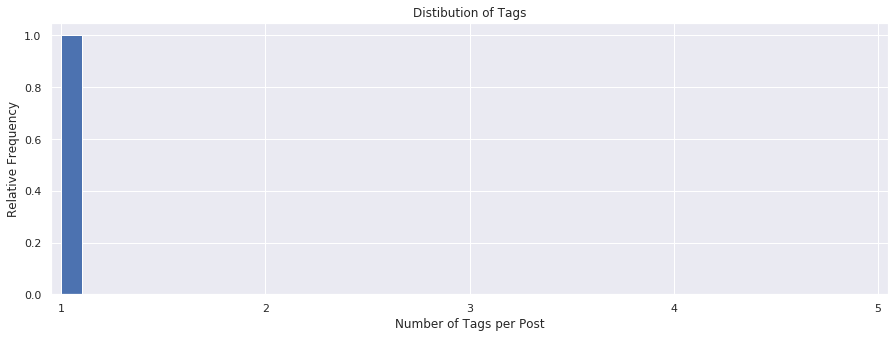

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.hist(df['tags_length'], weights=np.zeros_like(df['tags_length']) + 1. / df['tags_length'].size);
ax.set(xlabel='Number of Tags per Post', 
       ylabel='Relative Frequency', 
       title='Distibution of Tags',
       xlim=[0.95,5.05],
       xticks=range(1,6));